# Clustering - K-Means - Breast Cancer Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Breast Cancer Dataset
Data source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [4]:
breast_cancer_data = pd.read_csv("breast_cancer_dataset.csv", na_values='?').drop(['Unnamed: 32', 'id'], axis = 1)
breast_cancer_data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
number_of_unique_classes = np.unique(np.array(breast_cancer_data.diagnosis))
print("Unique classes in response: %s" % number_of_unique_classes)

Unique classes in response: ['B' 'M']


In [7]:
categorical_variable_colnames = ["diagnosis"]

In [8]:
categorical_label_encoder = LabelEncoder()
breast_cancer_data["diagnosis"] = categorical_label_encoder.fit_transform(breast_cancer_data["diagnosis"])

In [9]:
print("Unique classes in response: %s" % np.unique(np.array(breast_cancer_data.diagnosis)))

Unique classes in response: [0 1]


In [10]:
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


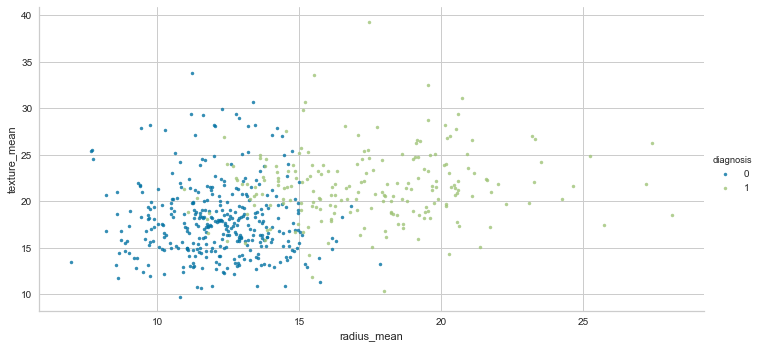

In [11]:
sns.lmplot(x = "radius_mean", y = "texture_mean", data = breast_cancer_data, 
           hue = 'diagnosis', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

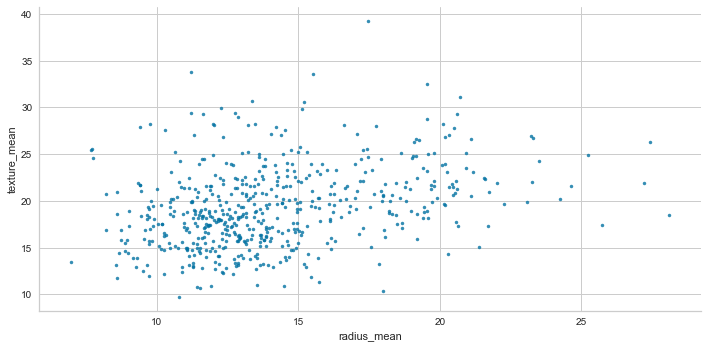

In [12]:
sns.lmplot(x = "radius_mean", y = "texture_mean", data = breast_cancer_data, 
           hue = None, fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

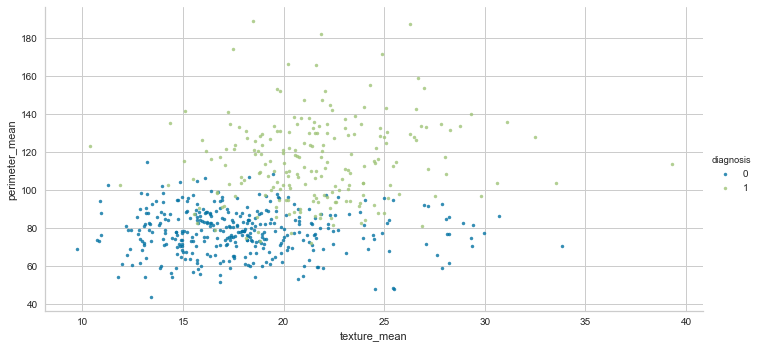

In [13]:
sns.lmplot(x = "texture_mean", y = "perimeter_mean", data = breast_cancer_data, 
           hue = 'diagnosis', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

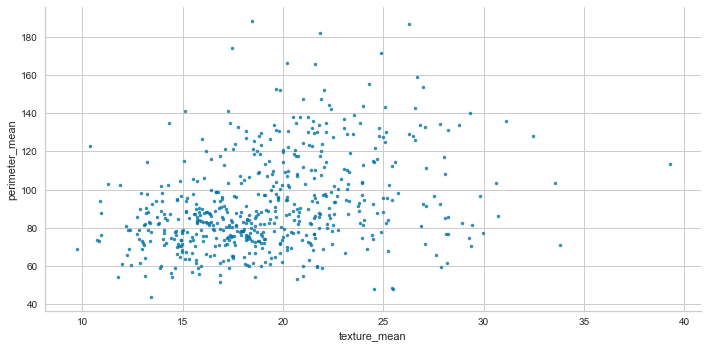

In [14]:
sns.lmplot(x = "texture_mean", y = "perimeter_mean", data = breast_cancer_data, 
           hue = None, fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

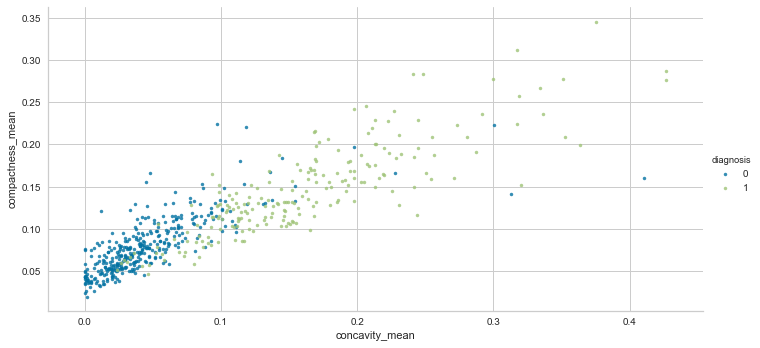

In [15]:
sns.lmplot(x = "concavity_mean", y = "compactness_mean", data = breast_cancer_data, 
           hue = 'diagnosis',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

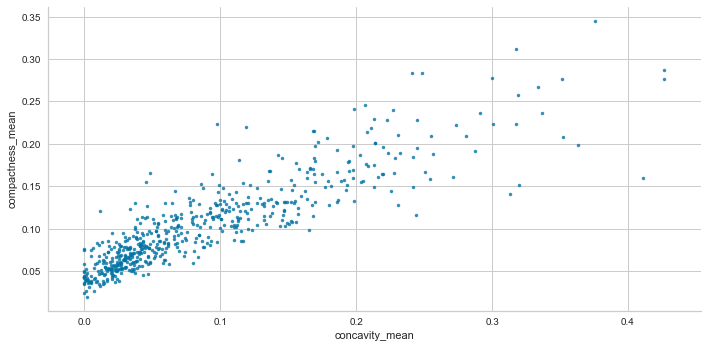

In [16]:
sns.lmplot(x = "concavity_mean", y = "compactness_mean", data = breast_cancer_data, 
           hue = None, fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [17]:
X = breast_cancer_data.drop(['diagnosis'], axis = 1)
y = breast_cancer_data['diagnosis'].values

In [18]:
print("X has shapes: %s" % str((X.shape)))

X has shapes: (569, 30)


## K-Means Clustering, K=2

In [19]:
model_kmeans = KMeans(n_clusters = 2)
print(model_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [20]:
model_groups = model_kmeans.fit(X)
model_groups.cluster_centers_

array([[1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01, 2.23311758e-01, 2.19214947e-01, 9.13298425e-02,
        2.83553653e-01, 8.32819406e-02],
       [1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01,

In [21]:
print("Shapes of model group clustes: %s" % str(model_groups.cluster_centers_.shape))

Shapes of model group clustes: (2, 30)


In [22]:
model_groups_cluster_centers = model_groups.cluster_centers_.transpose()
print("Shapes of model group clustes: %s" % str(model_groups_cluster_centers.shape))

Shapes of model group clustes: (30, 2)


In [23]:
clusters = model_groups.fit_predict(X)
print("Number of unique clusters: %s" % np.unique(clusters))

Number of unique clusters: [0 1]


In [24]:
X['clusters'] = clusters
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


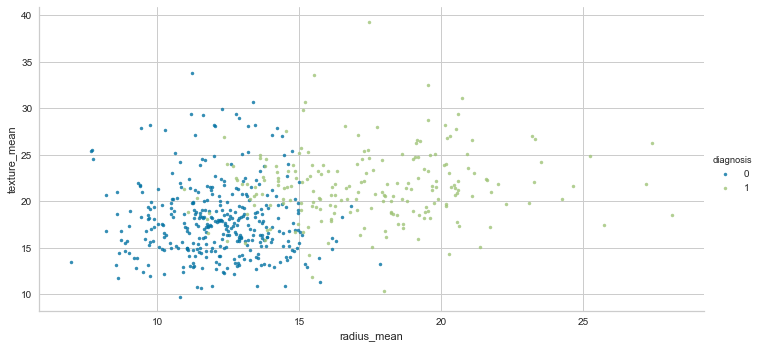

In [25]:
sns.lmplot(x = "radius_mean", y = "texture_mean", data = breast_cancer_data, 
           hue = 'diagnosis', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

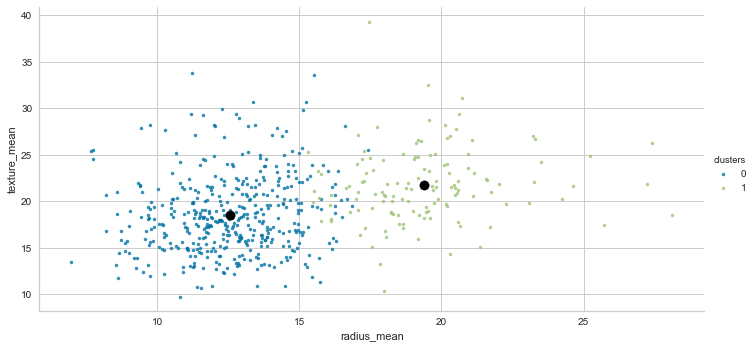

In [26]:
sns.lmplot(x = "radius_mean", y = "texture_mean", data = X, 
           hue = 'clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)

plt.scatter(model_groups_cluster_centers[0], 
            model_groups_cluster_centers[1], s = 90, color = 'black')
plt.show()

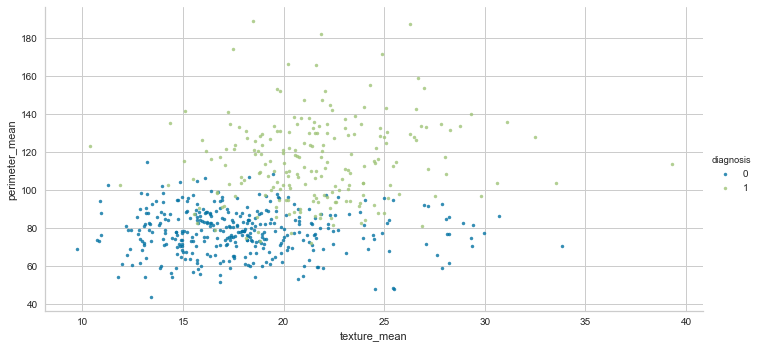

In [27]:
sns.lmplot(x = "texture_mean", y = "perimeter_mean", data = breast_cancer_data, 
           hue = 'diagnosis', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

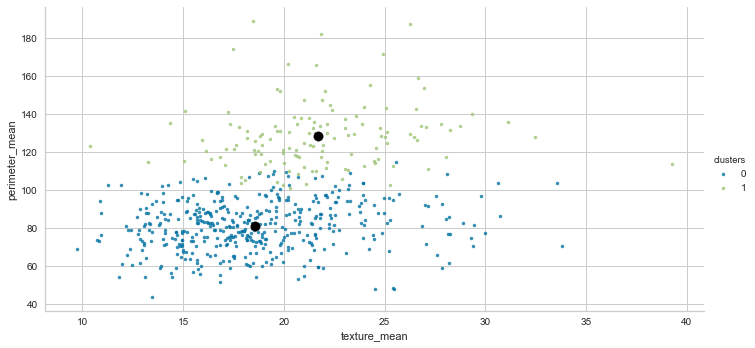

In [28]:
sns.lmplot(x = "texture_mean", y = "perimeter_mean", data = X, 
           hue = 'clusters', fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.scatter(model_groups_cluster_centers[1], 
            model_groups_cluster_centers[2], s = 90, color = 'black')
plt.show()

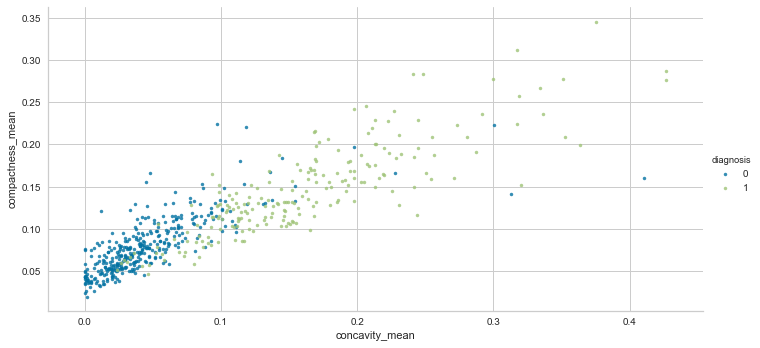

In [29]:
sns.lmplot(x = "concavity_mean", y = "compactness_mean", data = breast_cancer_data, 
           hue = 'diagnosis',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

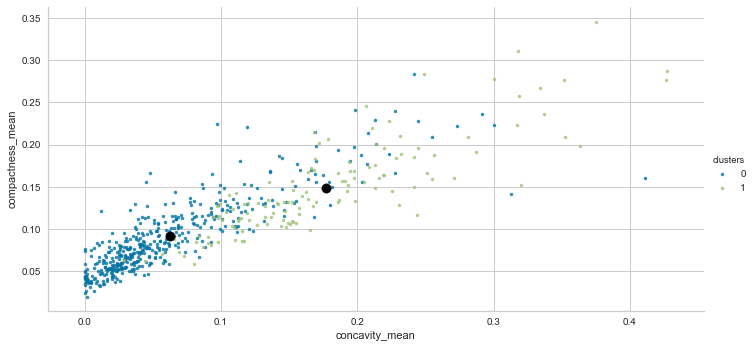

In [30]:
sns.lmplot(x = "concavity_mean", y = "compactness_mean", data = X, 
           hue = 'clusters',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.scatter(model_groups_cluster_centers[6], 
            model_groups_cluster_centers[5], s = 90, color = 'black')
plt.show()

In [31]:
print(confusion_matrix(y, model_kmeans.labels_))

[[356   1]
 [ 82 130]]


In [32]:
print(classification_report(y, model_kmeans.labels_))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.99      0.61      0.76       212

    accuracy                           0.85       569
   macro avg       0.90      0.81      0.83       569
weighted avg       0.88      0.85      0.84       569



In [33]:
print("Measure inertia %s" % model_kmeans.inertia_)

Measure inertia 77943099.87829883


In [34]:
print("Model score %s" % model_kmeans.score(X.drop(['clusters'], axis=1)))

Model score -77943099.87829871


## Mini Batch K-Means

In [35]:
X = X.drop(['clusters'], axis=1)

In [36]:
model_kmeans_mini_batch = MiniBatchKMeans(n_clusters = 2, batch_size = 50,  max_iter = 200)
print(model_kmeans_mini_batch)

MiniBatchKMeans(batch_size=50, compute_labels=True, init='k-means++',
                init_size=None, max_iter=200, max_no_improvement=10,
                n_clusters=2, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)


In [37]:
model_mini_groups = model_kmeans_mini_batch.fit(X)
model_mini_groups.cluster_centers_

array([[1.23969253e+01, 1.84943487e+01, 8.00903448e+01, 4.84340996e+02,
        9.56365517e-02, 9.18012644e-02, 6.25650167e-02, 3.35589866e-02,
        1.80640805e-01, 6.39232759e-02, 3.10423563e-01, 1.24601762e+00,
        2.19045900e+00, 2.39541111e+01, 7.47334291e-03, 2.42627318e-02,
        2.99128230e-02, 1.10405192e-02, 2.14639330e-02, 3.94320211e-03,
        1.38237337e+01, 2.44228927e+01, 9.04862261e+01, 6.01051916e+02,
        1.30168697e-01, 2.19028640e-01, 2.11224667e-01, 8.89543467e-02,
        2.85024904e-01, 8.35304023e-02],
       [1.90570787e+01, 2.20026404e+01, 1.26217978e+02, 1.14400449e+03,
        1.01050506e-01, 1.49561461e-01, 1.74947809e-01, 9.84451685e-02,
        1.91615169e-01, 6.08251124e-02, 7.19899438e-01, 1.26687584e+00,
        5.16588202e+00, 8.95560674e+01, 7.18341011e-03, 3.43064775e-02,
        4.58157303e-02, 1.67859270e-02, 2.02064045e-02, 4.16191573e-03,
        2.30216854e+01, 2.88651685e+01, 1.54476966e+02, 1.65416854e+03,
        1.39054045e-01,

In [38]:
print("Shapes of model group clustes: %s" % str(model_mini_groups.cluster_centers_.shape))

Shapes of model group clustes: (2, 30)


In [39]:
model_mini_groups_cluster_centers = model_mini_groups.cluster_centers_.transpose()
print("Shapes of model group clustes: %s" % str(model_mini_groups_cluster_centers.shape))

Shapes of model group clustes: (30, 2)


In [40]:
clusters = model_groups.fit_predict(X)
print("Number of unique clusters: %s" % np.unique(clusters))

Number of unique clusters: [0 1]


In [41]:
X['clusters'] = clusters
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [42]:
print(confusion_matrix(y, model_kmeans_mini_batch.labels_))

[[356   1]
 [ 78 134]]


In [43]:
print(classification_report(y, model_kmeans_mini_batch.labels_))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       357
           1       0.99      0.63      0.77       212

    accuracy                           0.86       569
   macro avg       0.91      0.81      0.84       569
weighted avg       0.88      0.86      0.85       569



In [44]:
print("Measure inertia %s" % model_kmeans.inertia_)

Measure inertia 77943099.87829883


In [45]:
print("Model score %s" % model_kmeans.score(X.drop(['clusters'], axis=1)))

Model score -77943099.87829871


***